In [5]:
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv

In [3]:
# Reading the file
df = pd.read_csv(
    'sms+spam+collection/SMSSpamCollection', 
    sep='\t', 
    names=['label', 'sms'],
    quoting=csv.QUOTE_NONE,
)
df

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


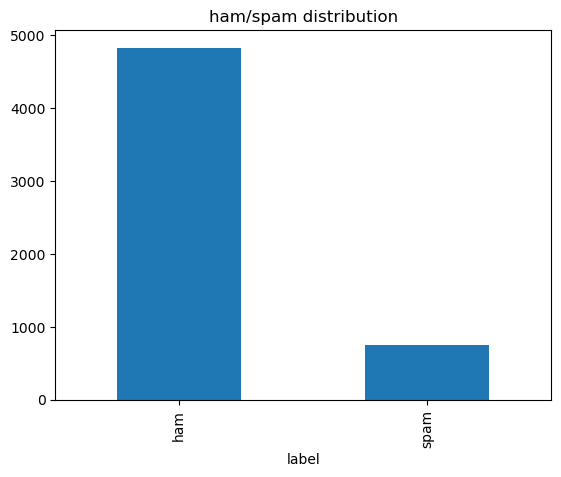

In [4]:
df.label.value_counts().plot(kind='bar')
plt.title('ham/spam distribution')
plt.show()

### Preprocessing

In [ ]:
def process_text(sms):
    sms = sms.lower()
    words = nltk.word_tokenize(sms)
    processed_text = [
        word for word in words \
            if (word.isalnum() \
                and word not in stopwords.words('english') \
                    and word not in string.punctuation)
    ]
    return ' '.join(processed_text)
df['processed sms'] = df['sms'].map(process_text)

In [10]:
df.head()

,label,sms,processed sms
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


### Splitting the dataset into train, valid and test datasets

In [11]:

train, temp = train_test_split(range(len(df)), stratify=df.label, test_size=0.25)
valid, test = train_test_split(temp, stratify=df.iloc[temp, :].label, test_size=0.5)
train_df = df.iloc[train, :]
valid_df = df.iloc[valid, :]
test_df = df.iloc[test, :]
train_df.shape, valid_df.shape, test_df.shape

((4180, 3), (697, 3), (697, 3))

In [12]:
# Saving the datasets into csv files
train_df.to_csv('sms+spam+collection/train.csv', index=False)
valid_df.to_csv('sms+spam+collection/valid.csv', index=False)
test_df.to_csv('sms+spam+collection/test.csv', index=False)